In [1]:
from mdss.ScoringFunctions.Bernoulli import Bernoulli
from mdss.ScoringFunctions.Poisson import Poisson
from mdss.MDSS import MDSS

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import warnings

warnings.filterwarnings('ignore')

In [6]:
dff2 = pd.read_csv('/Users/kayadetunji/Downloads/HAALSI_work/mdscan-master/project2_data_26_02_24.csv').drop(columns = 
       ['study_id'])
target_cols = ['glucose_result_phase1']
dff2.head()

,age_phase1,site,sex,highest_level_of_education_phase1,partnership_status_c_phase1,ses_site_quintile_c_phase1,occupation_phase1,alcohol_use_status_c_phase1,smoking_status_c_phase1,diabetes_history_phase1,...,change_in_triglycerides,change_in_glucose,change_in_s_creatinine,change_in_insulin,change_in_non_hdl,change_in_egfr,change_in_acr,change_in_mvpa,MAP_phase1,MAP_phase2
0,73.0,1,1,0,1,4,4,3,0,0,...,-0.22,6.91,12.65,44.40,0.21,-13.659833,NaN,360.0,94.666667,113.333333
1,78.0,1,0,0,2,2,4,0,0,0,...,0.35,4.66,31.14,25.69,0.84,-33.788348,NaN,-1870.0,98.833333,127.333333
2,76.0,1,1,2,1,5,-999,0,0,1,...,-0.12,2.33,51.59,-5.28,2.75,-34.278693,NaN,-1440.0,101.666667,110.000000
3,71.0,1,0,0,2,5,-999,0,0,1,...,0.02,1.96,23.43,NaN,1.54,-26.107492,NaN,40.0,112.833333,97.000000
4,76.0,1,1,0,0,1,4,0,2,0,...,-0.34,0.68,10.05,NaN,0.24,-12.917449,NaN,-1920.0,102.000000,92.666667


In [7]:
dff2.columns

Index(['age_phase1', 'site', 'sex', 'highest_level_of_education_phase1',
       'partnership_status_c_phase1', 'ses_site_quintile_c_phase1',
       'occupation_phase1', 'alcohol_use_status_c_phase1',
       'smoking_status_c_phase1', 'diabetes_history_phase1', 'mvpa_c_phase1',
       'weight_phase1', 'bmi_c_phase1', 'waist_hip_r_c_phase1',
       'waist_circumference_phase1', 'bp_sys_average_phase1',
       'bp_dia_average_phase1', 'fasting_confirmation_phase1',
       'glucose_result_phase1', 's_creatinine_phase1', 'insulin_result_phase1',
       'hdl_phase1', 'cholesterol_1_phase1', 'friedewald_ldl_c_phase1',
       'triglycerides_phase1', 'hypertension_status_c_phase1',
       'diabetes_status_c_phase1', 'non_hdl_c_phase1', 'egfr_c_phase1',
       'acr_c_phase1', 'age_phase2', 'diabetes_status_c_phase2',
       'hypertension_status_phase2', 'smoking_status_c_phase2',
       'diabetes_history_phase2', 'mvpa_c_phase2', 'weight_phase2',
       'bmi_c_phase2', 'waist_circumference_phase

In [8]:
dff2.diabetes_status_c_phase1.value_counts(normalize=True)

0    0.925941
1    0.074059
Name: diabetes_status_c_phase1, dtype: float64

In [9]:
dff3 = dff2.loc[((dff2.loc[:,'fasting_confirmation_phase1'] == 1))].copy()
# dff3

In [10]:
print('With both fasting and non-fasting: ', dff2.shape[0], 'individuals')
print('With both fasting only: ', dff3.shape[0], 'individuals')

With both fasting and non-fasting:  2444 individuals
With both fasting only:  2142 individuals


In [11]:
dff2.loc[:,'glucose_result_phase1'].max()

28.25

In [12]:
dff2.loc[:,'bp_sys_average_phase1'].max()

238.5

In [13]:
(dff2.shape[0] - dff3.shape[0])/dff2.shape[0]*100

12.356792144026187

(0.0, 15.0)

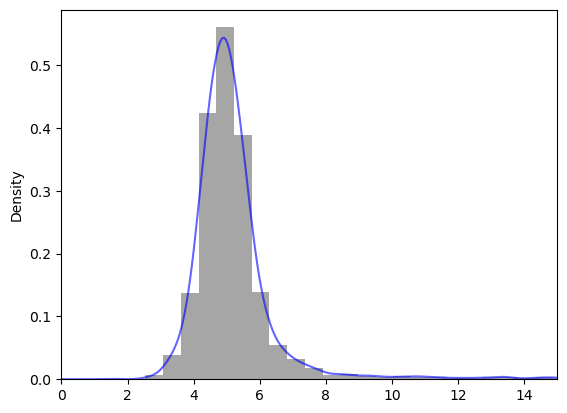

In [14]:
import matplotlib.pyplot as plt

min_range = dff2['glucose_result_phase2'].min()
max_range = dff2['glucose_result_phase2'].max()

# Adjust the conditions according to your specific needs
filtered_data = dff2[(dff2['glucose_result_phase1'] > -30) & (dff2['glucose_result_phase1'] < 400)].copy()
filtered_data = filtered_data[(filtered_data['bp_sys_average_phase1'] > -30) & (filtered_data['bp_sys_average_phase1'] < 400)].copy()
fig = plt.figure()
ax = fig.add_subplot(111)
# Plotting the histogram
filtered_data['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='gray', ax=ax)  # Adjust bins as needed
filtered_data['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.14, alpha=0.6, color='blue')
# dff3['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.3, color='green')
ax.set_xlim(0, 15)  # Adjust these values as needed

In [15]:
filtered_data.site.value_counts(normalize=True)*100

1    50.253807
3    49.746193
Name: site, dtype: float64

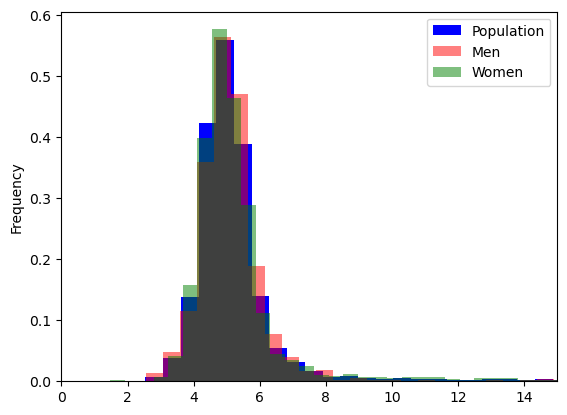

<Figure size 1000x800 with 0 Axes>

In [17]:
# Adjust the conditions according to your specific needs
# filtered_data = dff2[(dff2['glucose_result_phase1'] > -30) & (dff2['glucose_result_phase1'] < 400)].copy()
fig = plt.figure()
plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plotting the histogram
filtered_data['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', ax=ax, label='Population')
filtered_data.loc[((filtered_data.loc[:,'sex'] == 1))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.5, color='red', ax=ax, label='Men') 
filtered_data.loc[((filtered_data.loc[:,'sex'] == 0))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.5, color='green', ax=ax, label='Women') 
# filtered_data.loc[((filtered_data.loc[:,'sex'] == 1))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='gray', ax=ax)  # Adjust bins as needed
# filtered_data.loc[((filtered_data.loc[:,'sex'] == 0))]['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.14, alpha=0.6, color='blue')
# dff3['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.3, color='green')

ax.set_xlim(0, 15)  # Adjust these values as needed
ax.legend()

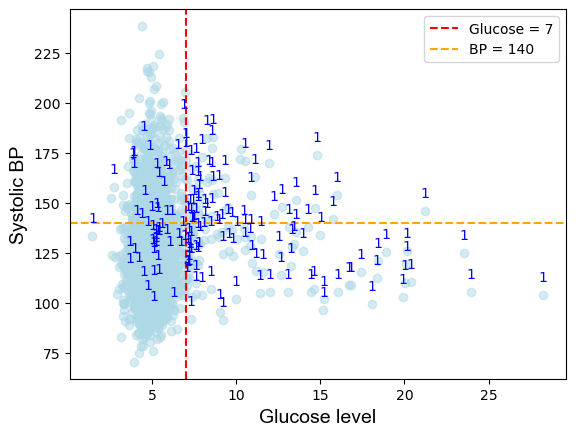

In [18]:
# Plot counts
plt.scatter(filtered_data['glucose_result_phase1'], filtered_data['bp_sys_average_phase1'], marker='o', color='lightblue', alpha=0.5)
# Add labels and title
plt.xlabel('Glucose level', fontsize=14, fontname="Arial")
plt.ylabel('Systolic BP', fontsize=14, fontname="Arial")

# Loop through the rows of the DataFrame to annotate points where 'status' equals 1
for i, row in filtered_data.iterrows():
    if row['diabetes_status_c_phase1'] == 1:
        plt.annotate('1', (row['glucose_result_phase1'], row['bp_sys_average_phase1']), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

# Adding a horizontal line from glucose level of 7 across the plot
plt.axvline(x=7, color='red', linestyle='--', label='Glucose = 7')

# Adding a vertical line from BP level of 130 across the plot
plt.axhline(y=140, color='orange', linestyle='--', label='BP = 140')

plt.legend()

# Display the plot
plt.show()

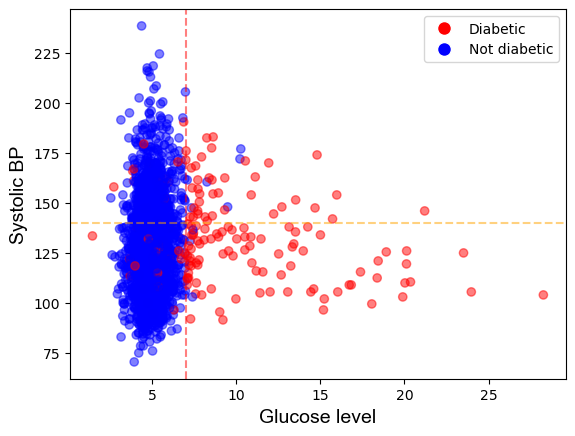

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color array based on the 'status' column, where 'red' indicates status=1, and another color (e.g., 'blue') for status=0
colors = np.where(filtered_data['diabetes_status_c_phase1'] == 1, 'red', 'blue')  # Red for status 1, blue for status 0

# Create the scatter plot with conditional colors
plt.scatter(filtered_data['glucose_result_phase1'], filtered_data['bp_sys_average_phase1'], marker='o', color=colors, alpha=0.5)

# Add labels and title
plt.xlabel('Glucose level', fontsize=14, fontname="Arial")
plt.ylabel('Systolic BP', fontsize=14, fontname="Arial")

# Optional: Add lines as per previous instructions
plt.axvline(x=7, color='red', linestyle='--', label='Glucose = 7', alpha=0.5)
plt.axhline(y=140, color='orange', linestyle='--', label='BP = 130', alpha=0.5)

# Adding a custom legend manually because plt.scatter() does not automatically create a legend for color conditions
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetic'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not diabetic')]
plt.legend(handles=legend_elements)


# Display the plot
plt.show()


In [25]:
numeric_columns = [col for col in filtered_data.columns \
                     if (is_numeric_dtype(filtered_data[col])) \
                     & (col not in target_cols) \
                     & (filtered_data[col].nunique() > 10)]

In [26]:
site_id = 1 # 1 - Agincourt, 3 - Nairobi

# Choose the relevant site and age group
dff = filtered_data[(filtered_data['age_phase1'] <= 60) & (filtered_data['age_phase1'] >= 40)].fillna(-999)

print('Original size: ', dff.shape)
dff = dff[(dff[target_cols] != -999).sum(axis = 1) == len(target_cols)].copy()
print('Size after removing records with missing targets: ', dff.shape)

Original size:  (1863, 72)
Size after removing records with missing targets:  (1863, 72)


In [27]:
# filtered_data['observed'] = (filtered_data['Temperature'] <= 0).astype(int)
# filtered_data = filtered_data.drop(columns=['glucose_result_phase1'])

# for col in ['weight_phase1', 'bmi_c_phase1', 'waist_hip_r_c_phase1',
#        'waist_circumference_phase1', 'bp_sys_average_phase1',
#        'bp_dia_average_phase1']:
#         dff[col] = pd.qcut(dff[col], 10, duplicates='drop')
#         dff[col] = dff[col].apply(lambda x: str(round(x.left, 2)) + ' - ' + str(round(x.right,2)))

dff['observed'] = (dff['glucose_result_phase1'])
#dff['expectation'] = dff['observed'].mean()

In [240]:
dff.expectation

131     5.295254
133     5.295254
134     5.295254
135     5.295254
137     5.295254
          ...   
2431    5.295254
2434    5.295254
2437    5.295254
2440    5.295254
2443    5.295254
Name: expectation, Length: 774, dtype: float64

In [191]:
dff['observed'].value_counts()

observed
4     415
5     188
3      97
6      41
7      10
8       5
10      4
2       2
13      2
16      2
15      2
9       2
14      1
23      1
11      1
12      1
Name: count, dtype: int64

In [62]:
# Defining the search space to be all the features except site, study_id, 
# and our created target_col and expectations columns

search_space = [col for col in dff.columns \
                if col not in \
                ['study_id','age_phase2', 'diabetes_status_c_phase2',
       'hypertension_status_phase2', 'smoking_status_c_phase2',
       'diabetes_history_phase2', 'mvpa_phase2', 'weight_phase2','s_creatinine_phase1','insulin_result_phase1',
       'bmi_c_phase2', 'waist_circumference_phase2','weight_phase1', 'waist_hip_r_c_phase2',
       'bp_sys_average_phase2', 'bp_dia_average_phase2', 'diabetes_status_c_phase1',
       'fasting_confirmed_phase2', 'glucose_result_phase2', 'hypertension_status_c_phase1',
       's_creatinine_phase2', 'insulin_result_phase2', 'hdl_phase2',
       'cholesterol_1_phase2', 'friedewald_ldl_c_phase2', 'mvpa_c_phase2', 'change_in_mvpa',
       'triglycerides_phase2', 'non_hdl_c_phase2', 'egfr_c_phase2',
       'acr_c_phase2', 'change_in_weight', 'change_in_bmi', 'non_hdl_c_phase1',
       'change_in_waist_hip_ratio', 'change_in_waist_circf',
       'change_in_systolic_ave', 'change_in_diastolic_ave', 'fasting_confirmation_phase1',
       'change_in_cholesterol', 'change_in_friedewald', 'change_in_hdl',
       'change_in_triglycerides', 'change_in_glucose', 'glucose_result_phase1',
       'change_in_s_creatinine', 'change_in_insulin', 'change_in_non_hdl',
       'change_in_egfr', 'change_in_acr', 'MAP_phase1', 'MAP_phase2', 'expectation', 'observed']]

In [64]:
# No HIV data
print(len(search_space))
search_space

22


['age_phase1',
 'site',
 'sex',
 'highest_level_of_education_phase1',
 'partnership_status_c_phase1',
 'ses_site_quintile_c_phase1',
 'occupation_phase1',
 'alcohol_use_status_c_phase1',
 'smoking_status_c_phase1',
 'diabetes_history_phase1',
 'mvpa_c_phase1',
 'bmi_c_phase1',
 'waist_hip_r_c_phase1',
 'waist_circumference_phase1',
 'bp_sys_average_phase1',
 'bp_dia_average_phase1',
 'hdl_phase1',
 'cholesterol_1_phase1',
 'friedewald_ldl_c_phase1',
 'triglycerides_phase1',
 'egfr_c_phase1',
 'acr_c_phase1']

In [65]:
def get_str(x):
    # This function turns a pandas bin to a meaningful string
    s = str(round(x.left, 2)) + ' - ' + str(round(x.right,2))
    return s

def custom_qcut(ser, contiguous = True):
    # Get the rows that are actual numbers
    sub_ser = ser[(ser != -111) \
                     & (ser != -222) \
                     & (ser != -555) \
                     & (ser != -999)]
    
    if contiguous:
        # if contiguous, treat all the special numbers the same
        ser = ser.replace(-111 , -999)
        ser = ser.replace(-222 , -999)
        ser = ser.replace(-555 , -999)

    # Bin the actual numbers into 10 bins for scanning
    sub_ser = pd.qcut(sub_ser, 10, duplicates='drop')
    sub_ser = sub_ser.apply(get_str).astype(str)
    ser[list(sub_ser.index)] = sub_ser
    return ser
            

In [66]:
contiguous = {}
dff_2 = dff.copy()

# Create a new dataframe with the numeric columns bins     
for col in numeric_columns:
    if col in search_space:
        dff_2[col] = custom_qcut(dff_2[col].copy())
        
        bins = list(dff_2[col].unique())
        
        if -999 in bins:
            bins.remove(-999)
        
        bins = sorted(bins, key=lambda x : float(x.split(' - ')[0]))
        
        contiguous[col] = bins

In [67]:
def compress_contiguous(subset, contiguous):
    # Shorten a contiguous list e.g [0-9, 10-19] is converted to [0 - 19] 
    new = {}
    
    for col in subset:
        if col in contiguous:
            if isinstance(subset[col][0], (float,int)):
                new[col] = [str(c) for c in subset[col]]
                continue
            i = -1 if isinstance(subset[col][-1], str) else -2
            new[col] = [subset[col][0].split(' - ')[0] + ' - ' + subset[col][i].split(' - ')[-1]]
            new[col] = new[col] if i == -1 else new[col] + [str(subset[col][-1])]
        else:
            new[col] = [str(c) for c in subset[col]]
    return new

def translate_subset_to_rule(subset):
    # Print the subset as a rule for easier understanding
    desc = ''
    for key, value in subset.items():
        # desc += key + ' = {' + ' OR '.join(value) + '} AND' + '\n'
        desc += key + '{' + ' OR '.join(value) + '} AND' + ' '

    return desc[:-5].replace('_',' ').replace('{', '[').replace('}', ']')

def count_conditions(subset):
    # Split the string by 'AND' and 'OR'
    conditions = subset.replace("AND", "OR").split("OR")
    
    # Count the number of conditions
    condition_count = len(conditions)
    
    return condition_count

#### All sites - `Agincourt` and ``Nairobi``

In [195]:
from mdss.ScoringFunctions.Gaussian import Gaussian
from mdss.ScoringFunctions.BerkJones import BerkJones

# alpha is valid for finding subsets from the range of 0.35 - 0.56
alpha = 0.6
penalty = 1.2
num_iters = 3
scoring_function = BerkJones(direction="positive", alpha=alpha)
scanner = MDSS(scoring_function)
dff_2['expectation']= alpha

subset, score = scanner.scan( dff_2[search_space] , dff_2['observed'] , dff_2['expectation'] , penalty=penalty , num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())

to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
temp_df = dff_2.loc[to_choose]
not_temp_df = dff_2.loc[~to_choose]
size = len(temp_df)
print(translate_subset_to_rule(compress_contiguous(subset, contiguous)))
print('Subset size: ',size)
print('Number of literals: ',count_conditions(translate_subset_to_rule(compress_contiguous(subset, contiguous))))
print('Score: ',score)

egfr c phase1[90.6 - 109.34] AND waist circumference phase1[880.0 - 1090.0] AND mvpa c phase1[90.0 - 630.0] AND occupation phase1[0] AND smoking status c phase1[0] AND bp dia average phase1[72.0 - 95.0]
Subset size:  23
Number of literals:  6
Score:  4.5489893466177875


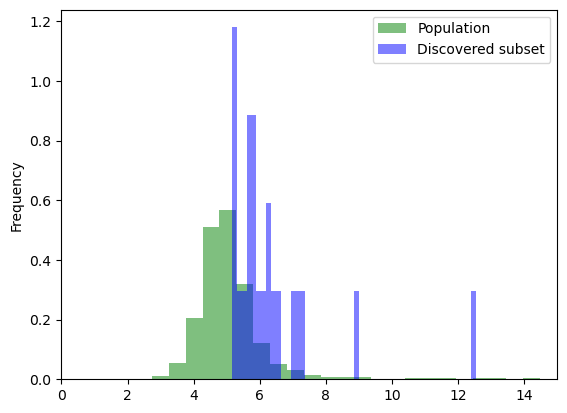

<Figure size 1000x800 with 0 Axes>

In [196]:
fig = plt.figure()
plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plotting the histogram
dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.5, ax=ax, label='Population')
temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
# not_temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='red', alpha=0.5, ax=ax, label='Not in subset')
ax.set_xlim(0, 15)
ax.legend()

In [288]:
temp_df['observed'].mean()

5.268905723905724

In [289]:
dff_2['observed'].mean()

4.966434108527131

In [290]:
not_temp_df['observed'].mean()

3.968277777777778